Beltran_Leyva Sinaloa_Family 2
Beltran_Leyva Familia 6
Beltran_Leyva Juarez 8
Beltran_Leyva Sinaloa 11
Beltran_Leyva Tijuana 1
Beltran_Leyva Golfo 11
Beltran_Leyva Zetas 12
Familia Juarez 2
Familia Tijuana 1
Familia Sinaloa 10
Familia Golfo 2
Familia Zetas 2
Golfo Juarez 8
Golfo Tijuana 5
Golfo Sinaloa 14
Golfo Zetas 34
Juarez Tijuana 3
Juarez Sinaloa 15
Juarez Zetas 4
Sinaloa Sinaloa_Family 1
Sinaloa Otros 1
Sinaloa Tijuana 6
Sinaloa Zetas 7
Sinaloa_Family Zetas 1
Tijuana Zetas 3


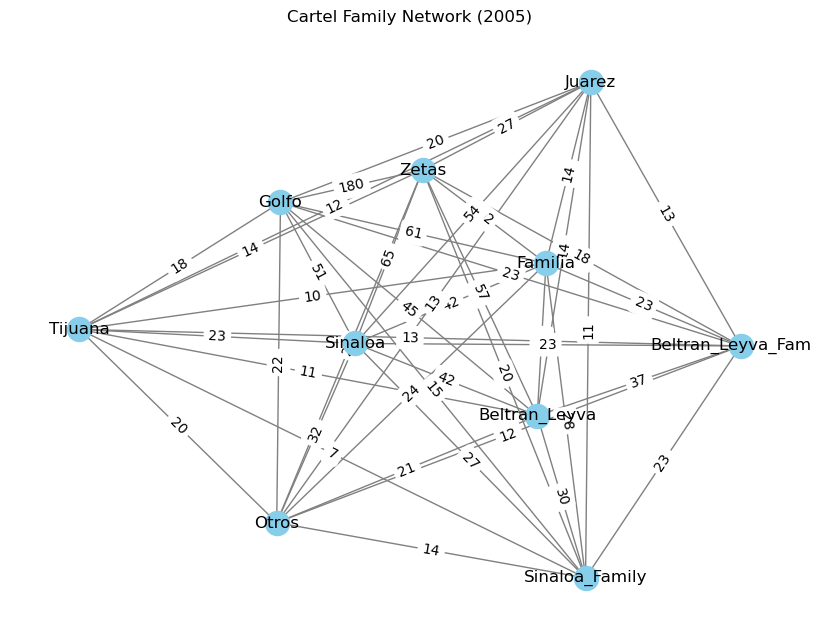

In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- Load data ---
df = pd.read_csv("CosciaRios2012_DataBase.csv")

family_cols = df.columns[3:]
graphs_by_year = {}

for year in df["Year"].unique():
    B = nx.Graph()
    year_data = df[df["Year"] == year]

    # Explicitly add both node types
    B.add_nodes_from(year_data["Code"].unique(), bipartite=0)
    B.add_nodes_from(family_cols, bipartite=1)

    # Add edges (municipality-family if present)
    for _, row in year_data.iterrows():
        muni = row["Code"]
        for fam in family_cols:
            if row[fam] == 1:
                B.add_edge(muni, fam)

    # Weighted projection onto families
    G_fam = nx.bipartite.weighted_projected_graph(B, family_cols)
    graphs_by_year[year] = G_fam

# Example output
for u, v, d in graphs_by_year[2005].edges(data=True):
    print(u, v, d["weight"])

# Optional visualization
G = graphs_by_year[2010]
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Cartel Family Network (2005)")
plt.show()



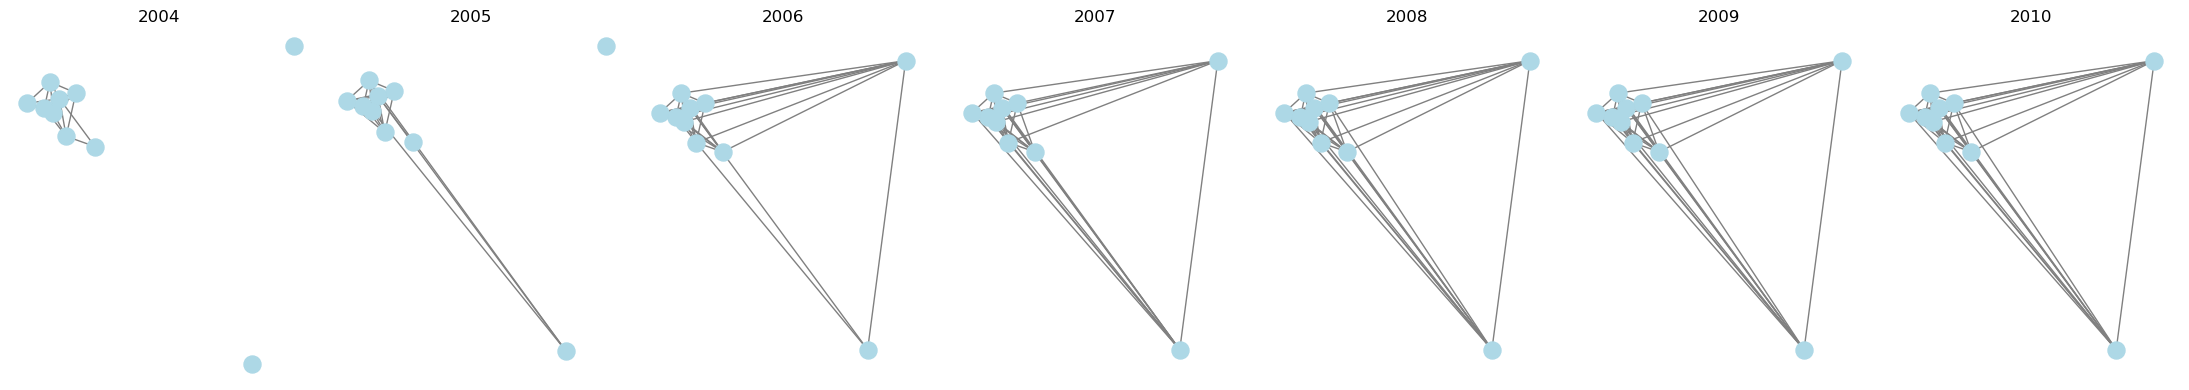

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

# Select years you want to visualize
years_to_plot = list(range(2004, 2011))  # 2004–2010 inclusive

# Define layout once (so positions are consistent across years)
# You can also recompute per graph if you prefer independent layouts
reference_year = years_to_plot[0]
pos = nx.spring_layout(graphs_by_year[reference_year], seed=42)

# Create figure with one row and N columns
fig, axes = plt.subplots(1, len(years_to_plot), figsize=(22, 4))

for i, year in enumerate(years_to_plot):
    ax = axes[i]
    G = graphs_by_year[year]
    
    # Reuse same node positions but adjust for missing nodes
    nx.draw(
        G, pos=pos, ax=ax,
        node_size=150,
        node_color="lightblue",
        edge_color="gray",
        with_labels=False
    )
    ax.set_title(str(year))
    ax.axis("off")

plt.tight_layout()
plt.show()

